<a href="https://colab.research.google.com/github/aishwaryalatha/Internship/blob/main/Bollywood_Movie_Trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
!pip install beautifulsoup4 requests
from bs4 import BeautifulSoup
import requests


In [ ]:
# Sample Bollywood movie dataset
data = {
    'movie_title': ['Movie A', 'Movie B', 'Movie C', 'Movie D', 'Movie E'],
    'genre': ['Action', 'Romance', 'Comedy', 'Drama', 'Thriller'],
    'release_year': [2023, 2022, 2021, 2020, 2019],
    'box_office_crores': [250, 150, 200, 180, 100],
    'lead_actor': ['Actor X', 'Actor Y', 'Actor Z', 'Actor X', 'Actor Y']
}

# Creating a DataFrame
bollywood_df = pd.DataFrame(data)

# Display first few rows
print(bollywood_df)


  movie_title     genre  release_year  box_office_crores lead_actor
0     Movie A    Action          2023                250    Actor X
1     Movie B   Romance          2022                150    Actor Y
2     Movie C    Comedy          2021                200    Actor Z
3     Movie D     Drama          2020                180    Actor X
4     Movie E  Thriller          2019                100    Actor Y


In [ ]:
print(bollywood_df.info())
print(bollywood_df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   movie_title        5 non-null      object
 1   genre              5 non-null      object
 2   release_year       5 non-null      int64 
 3   box_office_crores  5 non-null      int64 
 4   lead_actor         5 non-null      object
dtypes: int64(2), object(3)
memory usage: 332.0+ bytes
None
       release_year  box_office_crores
count      5.000000           5.000000
mean    2021.000000         176.000000
std        1.581139          55.946403
min     2019.000000         100.000000
25%     2020.000000         150.000000
50%     2021.000000         180.000000
75%     2022.000000         200.000000
max     2023.000000         250.000000


In [ ]:
genre_counts = bollywood_df['genre'].value_counts()
print("Movie Count by Genre:\n", genre_counts)


Movie Count by Genre:
 genre
Action      1
Romance     1
Comedy      1
Drama       1
Thriller    1
Name: count, dtype: int64


In [ ]:
box_office_by_genre = bollywood_df.groupby('genre')['box_office_crores'].sum()
print("Total Box Office Collection by Genre:\n", box_office_by_genre)


Total Box Office Collection by Genre:
 genre
Action      250
Comedy      200
Drama       180
Romance     150
Thriller    100
Name: box_office_crores, dtype: int64


<ipython-input-7-b3dbfd6b71f9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="viridis")


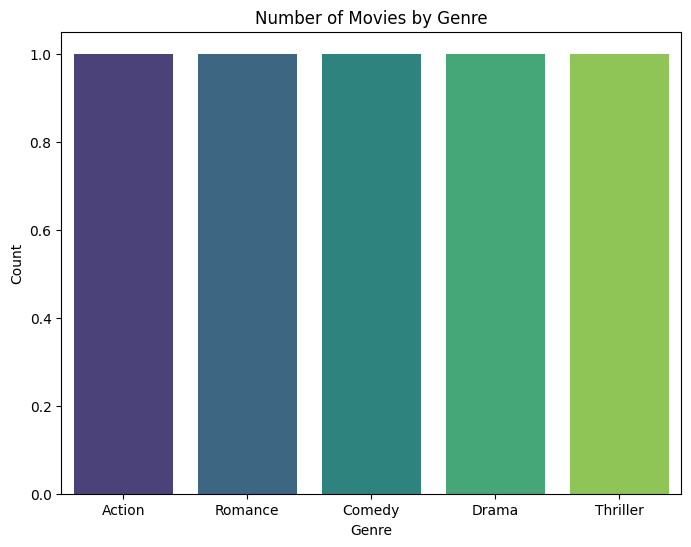

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="viridis")
plt.title("Number of Movies by Genre")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()


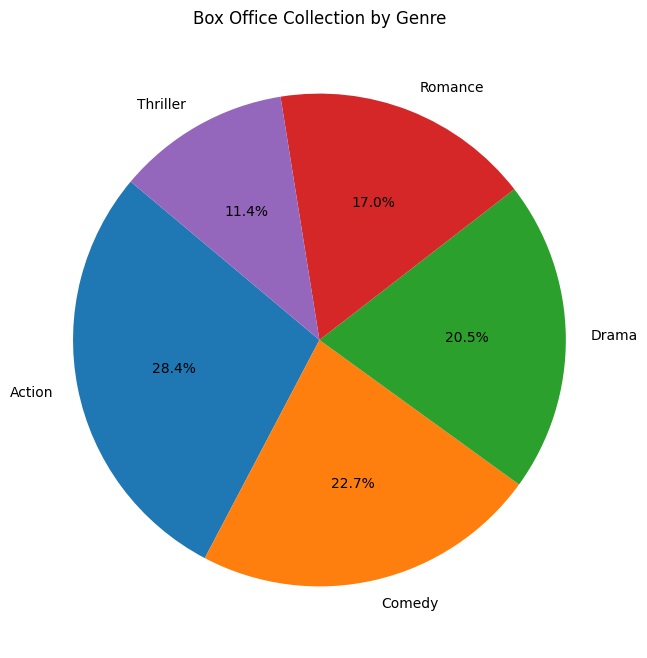

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(box_office_by_genre, labels=box_office_by_genre.index, autopct='%1.1f%%', startangle=140)
plt.title("Box Office Collection by Genre")
plt.show()


In [ ]:
url = "https://www.imdb.com/search/title/?genres=action&title_type=feature"
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

# Example: Extract movie titles
movies = soup.find_all("h3", class_="lister-item-header")
for movie in movies[:5]:  # Show top 5
    print(movie.a.text)


In [ ]:
# Enhanced Bollywood movie dataset
data = {
    'movie_title': ['Movie A', 'Movie B', 'Movie C', 'Movie D', 'Movie E'],
    'genre': ['Action', 'Romance', 'Comedy', 'Drama', 'Thriller'],
    'release_year': [2023, 2022, 2021, 2020, 2019],
    'box_office_crores': [250, 150, 200, 180, 100],
    'lead_actor': ['Actor X', 'Actor Y', 'Actor Z', 'Actor X', 'Actor Y'],
    'director': ['Director 1', 'Director 2', 'Director 3', 'Director 1', 'Director 2'],
    'imdb_rating': [7.5, 6.8, 8.2, 7.0, 6.5],
    'music_composer': ['Composer A', 'Composer B', 'Composer C', 'Composer A', 'Composer B']
}

# Creating a DataFrame
bollywood_df = pd.DataFrame(data)

# Display dataset
print(bollywood_df)


  movie_title     genre  release_year  box_office_crores lead_actor  \
0     Movie A    Action          2023                250    Actor X   
1     Movie B   Romance          2022                150    Actor Y   
2     Movie C    Comedy          2021                200    Actor Z   
3     Movie D     Drama          2020                180    Actor X   
4     Movie E  Thriller          2019                100    Actor Y   

     director  imdb_rating music_composer  
0  Director 1          7.5     Composer A  
1  Director 2          6.8     Composer B  
2  Director 3          8.2     Composer C  
3  Director 1          7.0     Composer A  
4  Director 2          6.5     Composer B  


In [ ]:
from bs4 import BeautifulSoup
import requests

# IMDb Bollywood movies URL (modify for specific genres or years)
url = "https://www.imdb.com/search/title/?genres=action&title_type=feature"

# Fetch the page
headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

# Extract movie titles
movies = soup.find_all("h3", class_="lister-item-header")

# Extract ratings and directors
ratings = soup.find_all("div", class_="inline-block ratings-imdb-rating")
directors = soup.find_all("p", class_="")

# Store data
movie_data = []

for i in range(min(5, len(movies))):  # Get first 5 movies
    title = movies[i].a.text
    rating = ratings[i].strong.text if ratings[i].strong else "N/A"
    director = directors[i].a.text if directors[i].a else "N/A"

    movie_data.append([title, rating, director])

# Convert to DataFrame
imdb_df = pd.DataFrame(movie_data, columns=['Title', 'IMDb Rating', 'Director'])

# Display the scraped data
print(imdb_df)


Empty DataFrame
Columns: [Title, IMDb Rating, Director]
Index: []


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Convert categorical columns to numeric
label_encoders = {}
categorical_features = ['genre', 'lead_actor', 'director', 'music_composer']

for col in categorical_features:
    le = LabelEncoder()
    bollywood_df[col] = le.fit_transform(bollywood_df[col])
    label_encoders[col] = le

# Define the target variable
bollywood_df['success'] = bollywood_df['box_office_crores'].apply(lambda x: 1 if x > 150 else 0)  # 1 = Hit, 0 = Flop

# Selecting features and target
X = bollywood_df[['genre', 'release_year', 'lead_actor', 'director', 'music_composer', 'imdb_rating']]
y = bollywood_df['success']

# Split into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred = rf_model.predict(X_test)

# Evaluate model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy Score: 0.0
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

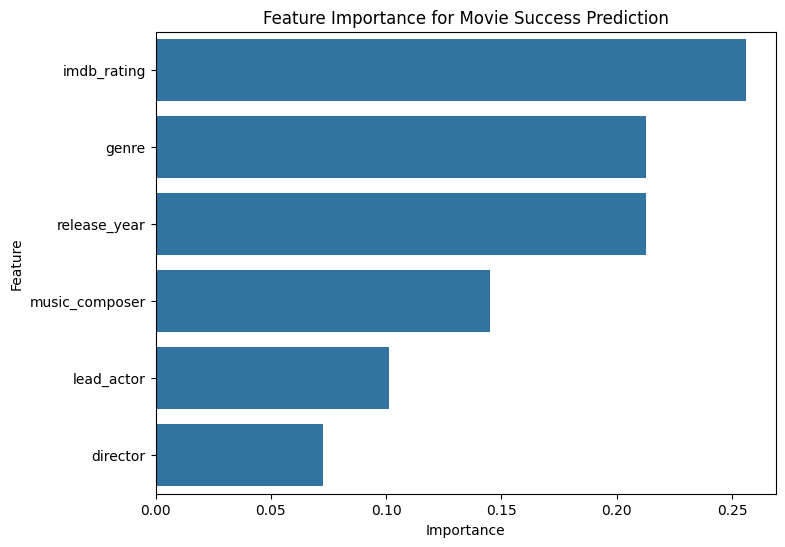

In [ ]:
import seaborn as sns

# Get feature importance
feature_importance = rf_model.feature_importances_

# Create a DataFrame for visualization
feat_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feat_importance_df = feat_importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(8,6))
sns.barplot(x='Importance', y='Feature', data=feat_importance_df)
plt.title("Feature Importance for Movie Success Prediction")
plt.show()
